<font color = 'orange'>

# Hypothesis Testing (One-way ANOVA test)

</font>

- to determine if the island a penguin is located in has a correlation with its body mass

## Overview

- [Identify penguins that exist in all 3 islands](penguins_anova.ipynb#identify-penguins-that-exist-in-all-3-islands)
- [Perform the one-way ANOVA test and check for assumptions](#2)
- [Conduct post hoc analysis using Tukey's HSD test](#3)
- [Summary](#4)

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [17]:
# load dataset into df
penguins = pd.read_csv('data/penguins_lter.csv')
penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [18]:
# rename columns
penguins = penguins.rename(columns={
    'studyName': 'study_name',
    'Sample Number': 'sample_number',
    'Species': 'species',
    'Region': 'region',
    'Island': 'island',
    'Stage': 'stage',
    'Individual ID': 'individual_id',
    'Clutch Completion': 'clutch_completion',
    'Date Egg': 'date_egg',
    'Culmen Length (mm)': 'culmen_length_mm',
    'Culmen Depth (mm)': 'culmen_depth_mm',
    'Flipper Length (mm)': 'flipper_length_mm',
    'Body Mass (g)': 'body_mass_g',
    'Sex': 'gender',
    'Delta 15 N (o/oo)': 'delta_15n',
    'Delta 13 C (o/oo)': 'delta_13c',
    'Comments': 'comments'
})

In [19]:
# extract only the name from species without 'penguin' and scientific name
penguins['species'] = penguins['species'].str.split(' ').str[0]
penguins.head()

,study_name,sample_number,species,region,island,stage,individual_id,clutch_completion,date_egg,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender,delta_15n,delta_13c,comments
0,PAL0708,1,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [20]:
# retrieve shape of dataset
penguins.shape

(344, 17)

In [21]:
# check for null values
penguins.isnull().sum()

study_name             0
sample_number          0
species                0
region                 0
island                 0
stage                  0
individual_id          0
clutch_completion      0
date_egg               0
culmen_length_mm       2
culmen_depth_mm        2
flipper_length_mm      2
body_mass_g            2
gender                10
delta_15n             14
delta_13c             13
comments             318
dtype: int64

In [22]:
# drop rows that do not have body mass indicated
penguins = penguins.dropna(subset=['body_mass_g']).reset_index(drop=True)
penguins.shape

(342, 17)

In [23]:
# check for duplicate rows
penguins[penguins.duplicated()]

,study_name,sample_number,species,region,island,stage,individual_id,clutch_completion,date_egg,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender,delta_15n,delta_13c,comments


In [24]:
# check data types
penguins.dtypes

study_name            object
sample_number          int64
species               object
region                object
island                object
stage                 object
individual_id         object
clutch_completion     object
date_egg              object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
gender                object
delta_15n            float64
delta_13c            float64
comments              object
dtype: object

In [25]:
# retrieve descriptive stats
penguins[['body_mass_g', 'species', 'island']].describe(include='all')

,body_mass_g,species,island
count,342.000000,342,342
unique,NaN,3,3
top,NaN,Adelie,Biscoe
freq,NaN,151,167
mean,4201.754386,NaN,NaN
std,801.954536,NaN,NaN
min,2700.000000,NaN,NaN
25%,3550.000000,NaN,NaN
50%,4050.000000,NaN,NaN
75%,4750.000000,NaN,NaN


<br><br>

## Identify penguins that exist in all 3 islands

In [26]:
# group the data set by species and island to find the count of each species of penguin on each island
penguins[['body_mass_g', 'species', 'island']].groupby(['species', 'island']).agg('count')

body_mass_g
species   island                
Adelie    Biscoe              44
          Dream               56
          Torgersen           51
Chinstrap Dream               68
Gentoo    Biscoe             123

- only adelie penguins are present in all 3 islands
- we will use adelie penguins as the basis for comparing whether the island an adelie penguin is located in is correlated with its body mass

In [27]:
# create a subset of df that only includes adelie penguins
adelie = penguins[penguins['species'] == 'Adelie'][['body_mass_g', 'species', 'island']]
adelie.head()

,body_mass_g,species,island
0,3750.0,Adelie,Torgersen
1,3800.0,Adelie,Torgersen
2,3250.0,Adelie,Torgersen
3,3450.0,Adelie,Torgersen
4,3650.0,Adelie,Torgersen


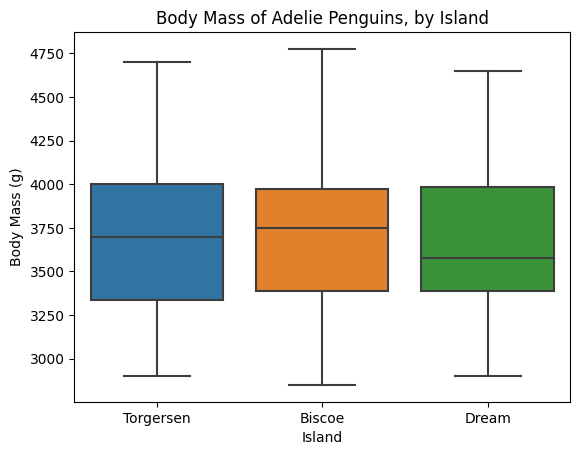

In [28]:
# create boxplots
sns.boxplot(y=adelie['body_mass_g'], x=adelie['island'])

plt.title("Body Mass of Adelie Penguins, by Island")
plt.xlabel("Island")
plt.ylabel("Body Mass (g)")

plt.show()

- there are no significant differences visually across adelie penguins located on different islands

<br><br>
<a id=2></a>

## Perform the one-way ANOVA test and check for assumptions

In [29]:
# perform one-way anova test
model = ols(formula='body_mass_g ~ C(island)', data=adelie).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(island),2.0,1.365461e+04,6827.304880,0.032048,0.968467
Residual,148.0,3.152878e+07,213032.291656,NaN,NaN


- p-value > 0.05 indicating that there is no statistically significant difference in the body mass of adelie penguins from different islands
- this is further supported by the low f-statistic
- next is to check whether the assumptions of normal distribution and homoscedasticity are true about residuals

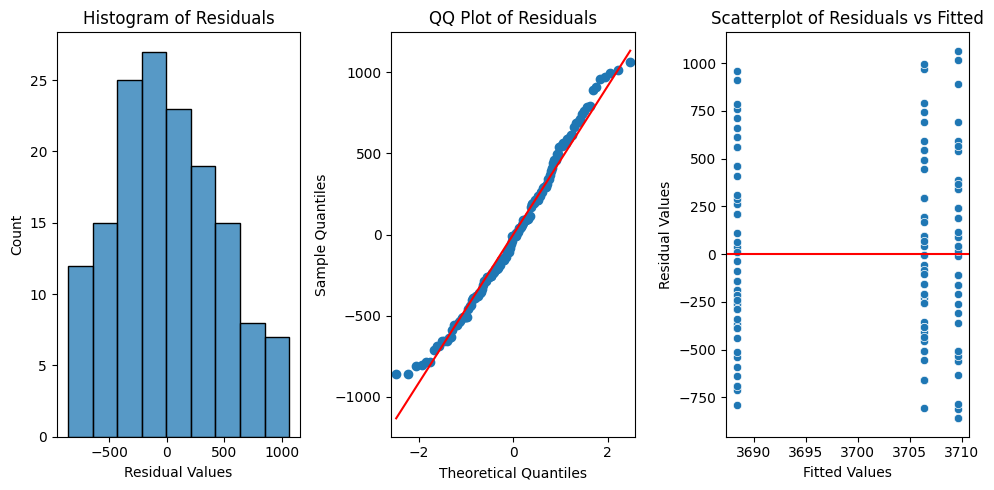

In [30]:
# plot the histogram, qqplot and scatterplot of residuals
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

sns.histplot(model.resid, ax=axes[0])
axes[0].set_title("Histogram of Residuals")
axes[0].set_xlabel("Residual Values")

sm.qqplot(model.resid, line='s', ax=axes[1])
axes[1].set_title("QQ Plot of Residuals")

sns.scatterplot(x=model.fittedvalues, y=model.resid, ax=axes[2])
axes[2].axhline(0, color='red')
axes[2].set_title("Scatterplot of Residuals vs Fitted")
axes[2].set_xlabel("Fitted Values")
axes[2].set_ylabel("Residual Values")

plt.tight_layout()
plt.show();

- histogram and qqplot suggest that the normality assumption is met
- scatterplot shows that in each category of fitted values, the residuals are randomly scattered, homoscedasticity is met
- these suggest that the ANOVA results are robust and reliable

<br><br>
<a id=3></a>

## Conduct post hoc analysis using Tukey's HSD test

In [215]:
# conduct the tukey's hsd test for one-way anova
result = pairwise_tukeyhsd(endog=adelie['body_mass_g'], groups=adelie['island'], alpha=0.05)
result.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Biscoe,Dream,-21.2662,0.9716,-241.4057,198.8732,False
Biscoe,Torgersen,-3.2865,0.9993,-228.1239,221.5509,False
Dream,Torgersen,17.9797,0.9779,-193.5303,229.4897,False


- each row represents pairwise comparison between body mass of adelie penguins from 2 different islands
- p-value is > 0.05 for every pair, further supporting the conclusion that there is no statistically significant difference in the body mass of Adelie penguins from different islands

<br><br>
<a id=4></a>

<font color = 'orange'>

## Summary

</font>

- based on the results of the tests, there is no evidence to support the hypothesis that the island where adelie penguins are located has a correlation with their body mass
- other factors (diet, colony size etc) may have a higher association with adelie penguins' body mass

<br><br><br><br>

# Acknowledgements
- data courtesy of [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) and the [Palmer Station, Antarctica LTER](https://lternet.edu/site/palmer-antarctica-lter/), a member of the [Long Term Ecological Research Network](https://lternet.edu/), provided via [Palmer Archipelago (Antarctica) penguin data ](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data) on Kaggle